###Introduction


The following involves scraping data from the website [Coin Market Cap](https://coinmarketcap.com/) related to cryptocurrencies.

> * CoinMarketCap is a widely used website in the cryptocurrency domain that provides a comprehensive platform for tracking and analyzing various aspects of the cryptocurrency market. The website offers real-time data on a vast array of cryptocurrencies, including their names, current market prices, market capitalization (total value), trading volumes, circulating supply (amount in circulation), and historical price trends. Additionally, CoinMarketCap aggregates data on exchanges, trading pairs, market trends, and other relevant metrics.
> * The goal here is to extract information about the top cryptocurrencies, including their names, prices, associated charts, etc

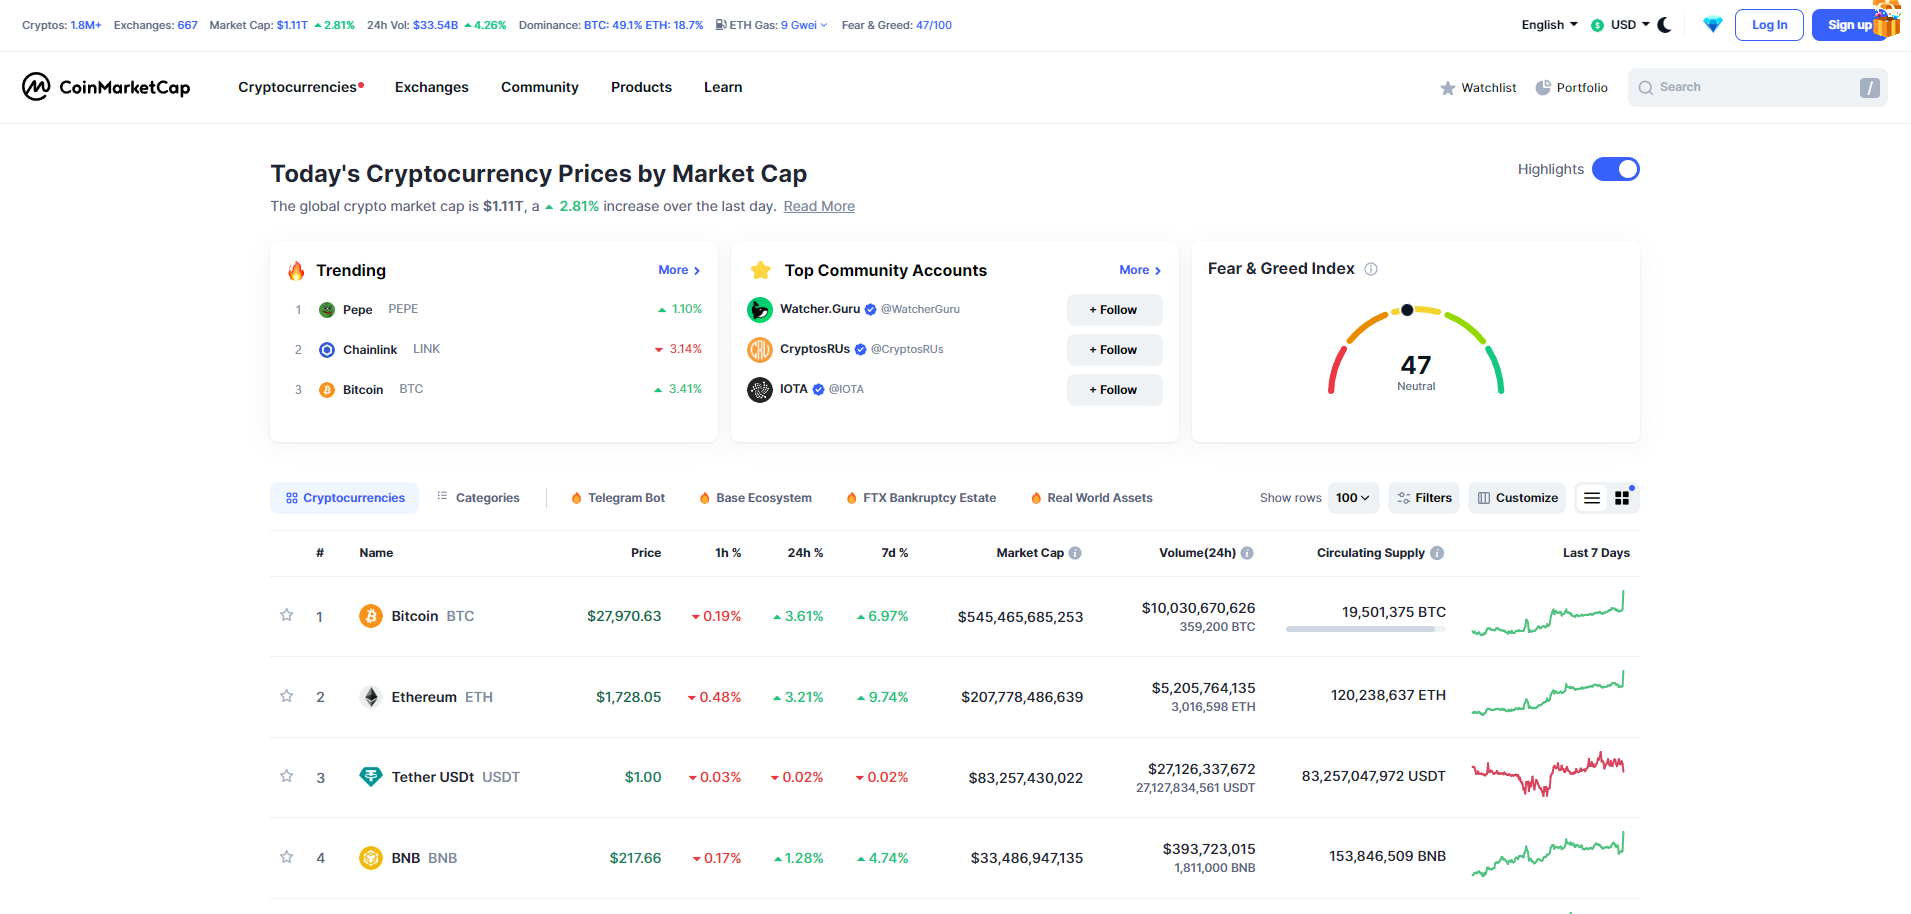



---



######1. All Imports

In [43]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from IPython.display import display, HTML

######2. URL to Scrape

In [44]:
url = "https://coinmarketcap.com/"


######3. Send a GET request and parse the HTML content

In [45]:
result = requests.get(url).text
doc = BeautifulSoup(result, "html.parser")

######4. Extract Table Data and Explore

In [46]:
tbody = doc.tbody
trs = tbody.find_all('tr')

#Gets ETH i.e. Ethereum
print(trs[2].previous_sibling)

#Gets all rows from ETH onwards
print(list(trs[1].next_siblings))


<tr><td><span class="sc-b8460745-2 cOjIsr"></span></td><td style="text-align:start"><p class="sc-4984dd93-0 iWSjWE" color="text2" data-sensors-click="true" font-size="14">2</p></td><td style="text-align:start"><div class="sc-aef7b723-0 LCOyB" display="flex"><a class="cmc-link" href="/currencies/ethereum/"><div class="sc-aef7b723-0 sc-efbac737-0 kmwUyk" data-sensors-click="true"><img alt="ETH logo" class="coin-logo" decoding="async" fetchpriority="low" loading="lazy" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1027.png"/><div class="sc-aef7b723-0 sc-efbac737-1 bZnFXd hide-ranking-number"><p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">Ethereum</p><div class="sc-efbac737-2 eBIuYp" data-nosnippet="true"><p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data-sensors-click="true" font-size="1">ETH</p></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY"><a class="cmc

  * tbody represents the tables body
  *trs represents every row of the body

######5. Data Scraping

In [47]:
# Initialize data list to store scraped information
data = []

# Iterate through table rows and extract relevant data
for tr in trs[:10]:  # Iterate through the first 10 table rows

    # Extract cryptocurrency name and price information
    name, price = tr.contents[2:4]
    name = name.p.string  # Extract the name
    price = price.a.string  # Extract the price

    # Extract market capitalization, volume, and supply information
    volume, supply = tr.contents[8:10]
    volume = volume.p.string  # Extract trading volume
    supply = supply.p.string  # Extract circulating supply

    img_tag = tr.contents[10].find('img')  # Find the img tag
    img_src = img_tag['src'] if img_tag else None  # Extract the image source

    # Use HTML <img> tag to display the image
    img_html = '<img src="{}" alt="Image" style="max-width:100px;">'.format(img_src) if img_src else 'No image available'

    # Append the extracted data for this row to the 'data' list
    data.append([name, price, volume, supply, img_html])

data

[['Bitcoin',
  '$27,837.69',
  '$10,370,977,304',
  '19,501,375 BTC',
  '<img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/1.svg" alt="Image" style="max-width:100px;">'],
 ['Ethereum',
  '$1,721.35',
  '$5,385,216,444',
  '120,238,637 ETH',
  '<img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/1027.svg" alt="Image" style="max-width:100px;">'],
 ['Tether USDt',
  '$1.00',
  '$27,069,847,686',
  '83,257,047,972 USDT',
  '<img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/825.svg" alt="Image" style="max-width:100px;">'],
 ['BNB',
  '$217.53',
  '$396,838,891',
  '153,846,509 BNB',
  '<img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/1839.svg" alt="Image" style="max-width:100px;">'],
 ['XRP',
  '$0.5221',
  '$568,286,997',
  '53,312,364,216 XRP',
  '<img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/52.svg" alt="Image" style="max-width:100px;">'],
 ['USDC',
  '$1.00',
  '$2,188,563,08

######6. Display Data

In [48]:
df = pd.DataFrame(data, columns=['Name', 'Price', 'Volume', 'Supply', 'Chart'])

# Display the DataFrame with images using HTML
display(HTML('<h2>Coin Market Data</h2>'))
display(HTML('<p>This table displays data for the top 10 cryptocurrencies from CoinMarketCap.</p>'))
display(HTML('<br> </br>'))
display(HTML(df.to_html(escape=False)))

######References



1.   [Data Scraping Series By Tim](https://www.youtube.com/@TechWithTim)
2.   [Navigating Through HTML Family Tree](https://www.youtube.com/@learnerea)
3.   [Data Scraping: Beautiful Soup](https://realpython.com/beautiful-soup-web-scraper-python/)
4.   [Amazon Scraper](https://colab.research.google.com/drive/1eCrcLonf3Kh0kznSeeRDbP0a2iAMmCqm?usp=sharing)

